In [36]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import skewnorm

In [19]:
normal_data = stats.norm.rvs(size=1000, loc=0, scale=1)

normal_data = np.array(normal_data)

min(normal_data), max(normal_data)

(-2.959957751187107, 3.507893054030152)

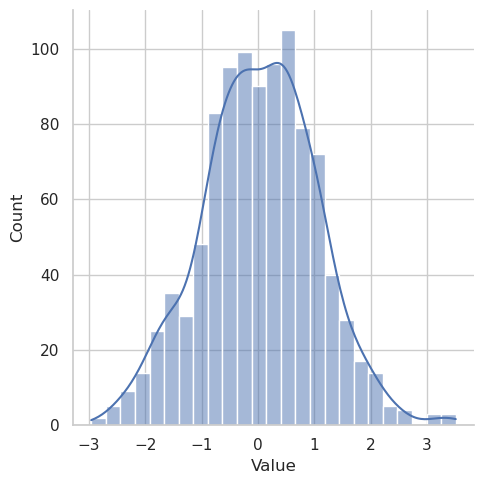

In [20]:
dataframe = pd.DataFrame(normal_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [21]:
np.mean(normal_data), np.median(normal_data), stats.mode(normal_data), np.var(normal_data), np.std(normal_data)

(0.031215517752327435,
 0.04721848138867668,
 ModeResult(mode=-2.959957751187107, count=1),
 1.0348499807848681,
 1.0172757643750627)

In [26]:
# Between mean and mean + std
a = normal_data >= np.mean(normal_data)

b = normal_data <= np.mean(normal_data) + np.std(normal_data)

np.sum(a & b)

351

In [27]:
# Between mean and mean - std
a = normal_data >= np.mean(normal_data) - np.std(normal_data)

b = normal_data <= np.mean(normal_data)

np.sum(a & b)

348

In [28]:
# Between mean - std and mean + std
a = normal_data >= np.mean(normal_data) - np.std(normal_data)

b = normal_data <= np.mean(normal_data) + np.std(normal_data)

np.sum(a & b)

699

In [29]:
699/1000

0.699

In [30]:
height_data = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [34]:
len(height_data), min(height_data), max(height_data), np.mean(height_data), np.median(height_data), stats.mode(height_data), np.var(height_data), np.std(height_data), stats.variation(height_data) * 100

(100,
 126.0,
 192.5,
 159.25,
 159.25,
 ModeResult(mode=157.5, count=10),
 186.3225,
 13.65,
 8.571428571428571)

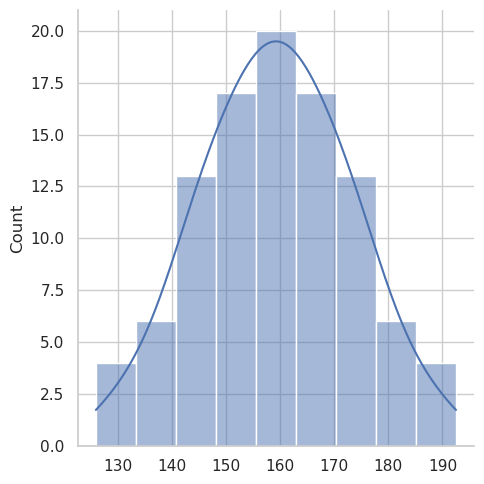

In [35]:
sns.displot(height_data, kde=True)

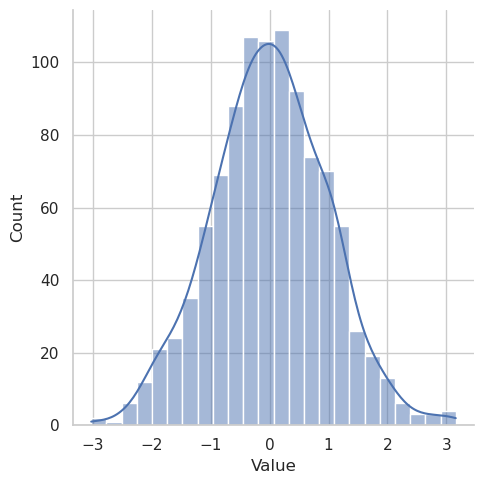

In [37]:
normal_data = skewnorm.rvs(a=0, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(normal_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [38]:
np.mean(normal_data), np.median(normal_data), stats.mode(normal_data), np.var(normal_data), np.std(normal_data)

(0.002087105795489375,
 0.0013583407310566963,
 ModeResult(mode=-3.0310023142249736, count=1),
 0.9509645111489192,
 0.9751740927387885)

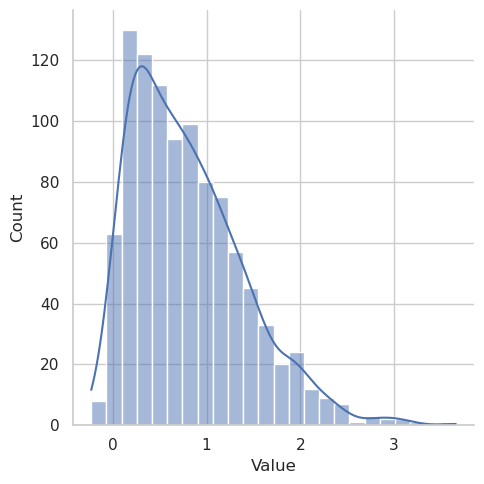

In [41]:
positive_data = skewnorm.rvs(a=10, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(positive_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [42]:
np.mean(positive_data), np.median(positive_data), stats.mode(positive_data), np.var(positive_data), np.std(positive_data)

(0.7949255430591147,
 0.6814554375362604,
 ModeResult(mode=-0.23253092711862472, count=1),
 0.36341465315313976,
 0.602838828504883)

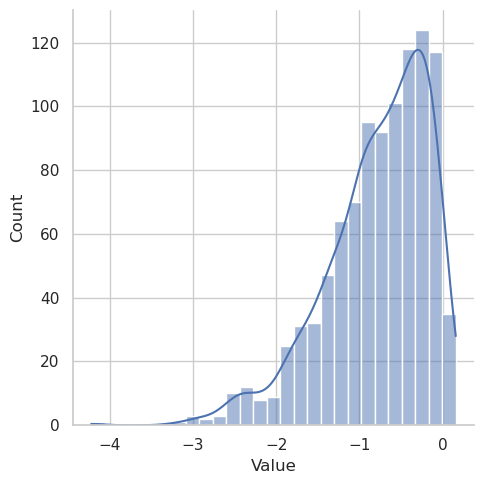

In [43]:
negative_data = skewnorm.rvs(a=-10, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(negative_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [44]:
np.mean(negative_data), np.median(negative_data), stats.mode(negative_data), np.var(negative_data), np.std(negative_data)

(-0.7836697164553496,
 -0.6657509639674155,
 ModeResult(mode=-4.225368501989287, count=1),
 0.39257331673581464,
 0.6265567147001256)